**AUTOML-PYCARET**

PyCaret is an open-source, low-code machine learning library in Python. It is designed to simplify the process of training and deploying machine learning models, by providing a suite of pre-processing, modeling, and evaluation functions. PyCaret allows users to build, compare, and tune models using just a few lines of code, without requiring deep knowledge of machine learning algorithms. It also provides a range of visualization and interpretation tools to help understand model performance and feature importance. PyCaret supports a wide range of supervised and unsupervised learning tasks, including classification, regression, clustering, anomaly detection, and natural language processing.

In [408]:
pip install pycaret 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


**About Dataset**

This dataset consists of data of Top 500 Most Expensive Footballer In 2021. The data is according to the prices listed in transfer_market along with data like goals, assists, matches, age, etc.

In [410]:
data = pd.read_csv('https://raw.githubusercontent.com/KodandRam/Expensive-Football-Players-2021/main/players.csv')


In [411]:
data.head()

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   500 non-null    int64  
 1   Name                         500 non-null    object 
 2   Position                     500 non-null    object 
 3   Age                          500 non-null    int64  
 4   Markey Value In Millions(£)  500 non-null    float64
 5   Country                      500 non-null    object 
 6   Club                         500 non-null    object 
 7   Matches                      500 non-null    int64  
 8   Goals                        500 non-null    int64  
 9   Own Goals                    500 non-null    int64  
 10  Assists                      500 non-null    int64  
 11  Yellow Cards                 500 non-null    int64  
 12  Second Yellow Cards          500 non-null    int64  
 13  Red Cards           

In [413]:
data.isnull().sum()

Unnamed: 0                     0
Name                           0
Position                       0
Age                            0
Markey Value In Millions(£)    0
Country                        0
Club                           0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
dtype: int64

In [414]:
data.isna().sum()

Unnamed: 0                     0
Name                           0
Position                       0
Age                            0
Markey Value In Millions(£)    0
Country                        0
Club                           0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
dtype: int64

In [415]:
df=data

**Label Encoding**

In [416]:
df.Position.value_counts()

Centre-Back           87
Central Midfield      74
Centre-Forward        70
Right Winger          48
Left Winger           46
Attacking Midfield    41
Defensive Midfield    41
Right-Back            30
Left-Back             23
Goalkeeper            19
Second Striker         8
Left Midfield          8
Right Midfield         5
Name: Position, dtype: int64

In [417]:
# create a LabelEncoder object
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Position'])

# transform the categorical values to numeric
df['Position'] = le.transform(df['Position'])

In [418]:
df.Country.value_counts()

England           67
France            58
Spain             52
Brazil            41
Germany           29
Portugal          26
Italy             26
Argentina         22
Netherlands       17
Belgium           14
Uruguay           11
Cote d'Ivoire      8
Croatia            8
Denmark            7
Nigeria            7
Colombia           7
Austria            6
Turkey             6
Senegal            6
Switzerland        6
Serbia             5
Scotland           5
Poland             5
United States      5
Sweden             4
Algeria            4
Morocco            4
Mexico             3
Norway             3
Ukraine            3
Zambia             2
Albania            2
Mali               2
Guinea             2
Japan              2
Canada             2
Czech Republic     2
Burkina Faso       2
The Gambia         1
Iran               1
Israel             1
Georgia            1
Gabon              1
Venezuela          1
Wales              1
Montenegro         1
Jamaica            1
Cameroon     

In [419]:
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Country'])

# transform the categorical values to numeric
df['Country'] = le.transform(df['Country'])

In [420]:
df.Club.value_counts()

Manchester United                19
Manchester City                  18
Paris Saint-Germain              16
Tottenham Hotspur                16
Chelsea FC                       16
                                 ..
Club Atlético Vélez Sarsfield     1
KRC Genk                          1
Watford FC                        1
Stade Rennais FC                  1
Celta de Vigo                     1
Name: Club, Length: 81, dtype: int64

In [421]:
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Club'])

# transform the categorical values to numeric
df['Club'] = le.transform(df['Club'])

In [422]:
df.head()

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,3,22,144.0,17,50,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,3,21,135.0,36,14,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,3,28,108.0,16,69,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,7,26,90.0,16,42,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,10,29,90.0,15,41,15,15,0,6,1,0,0,0,3


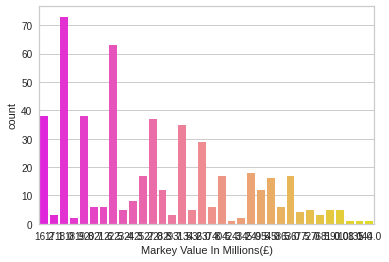

In [423]:
import seaborn as sns
sns.countplot(df['Markey Value In Millions(£)'],palette='spring');


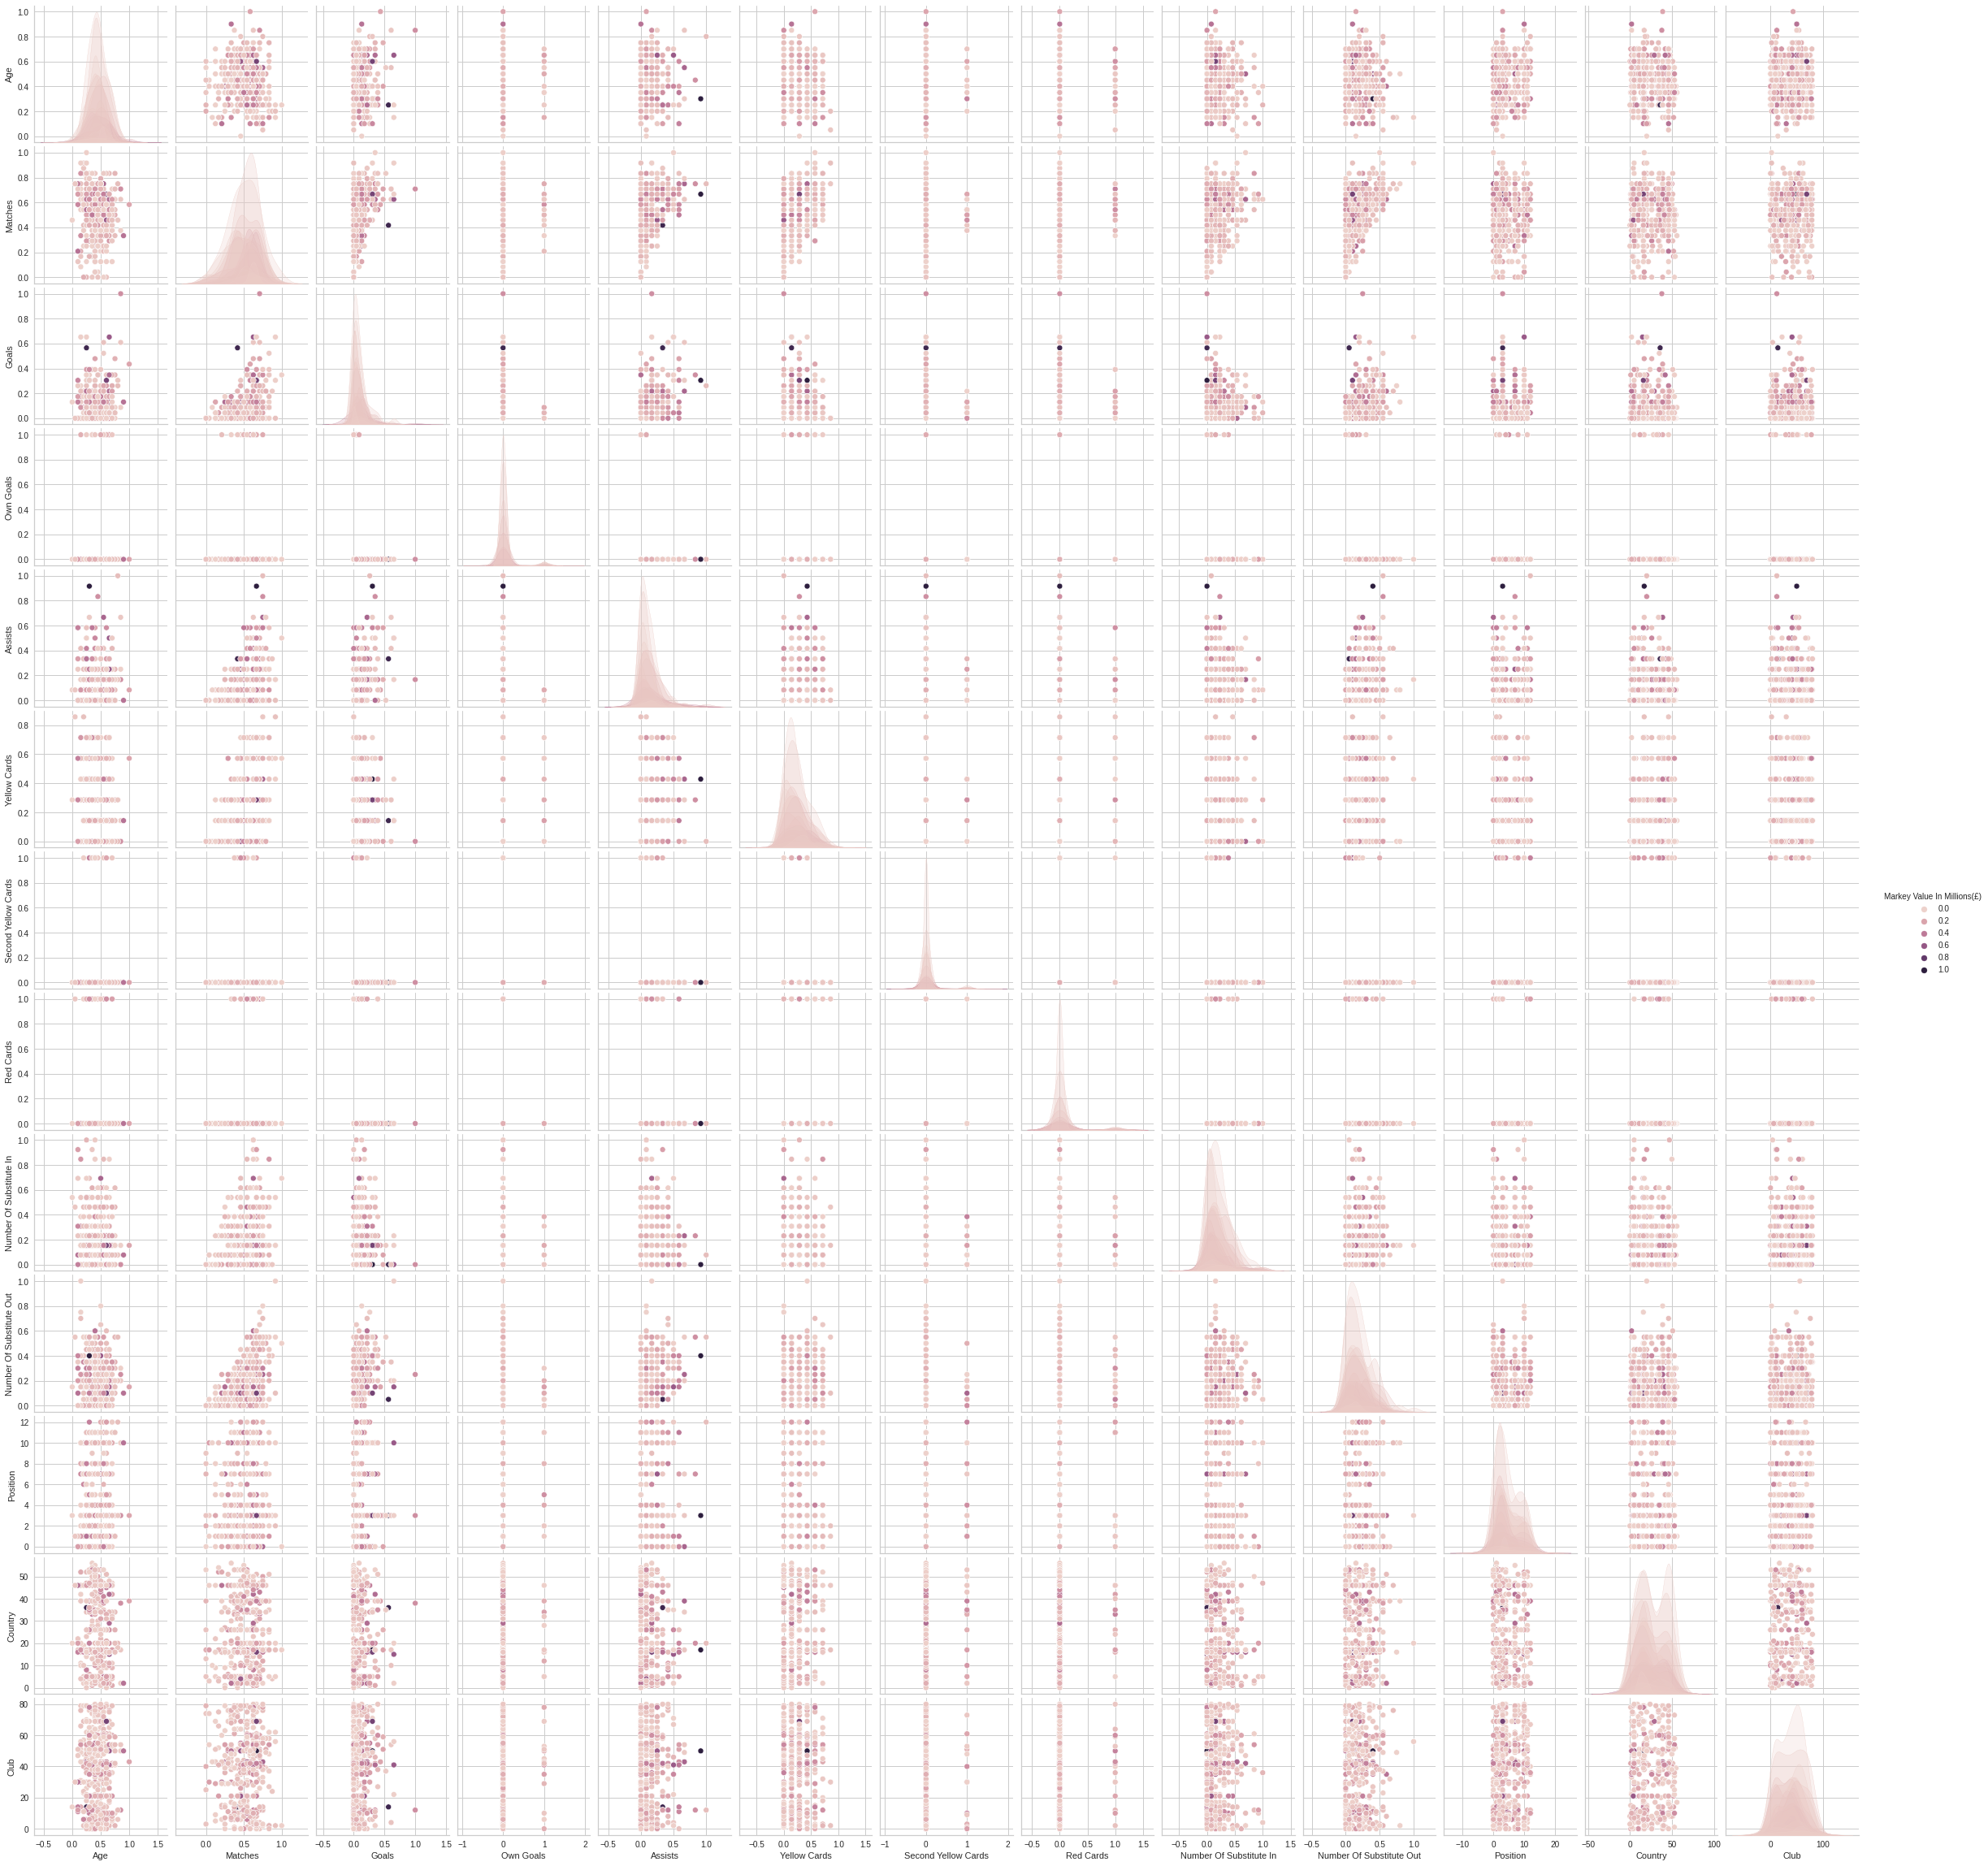

In [478]:
sns.pairplot(df,hue='Markey Value In Millions(£)');

In [425]:
numeric_df=df[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
'Red Cards', 'Number Of Substitute In','Number Of Substitute Out','Markey Value In Millions(£)']]

<AxesSubplot:>

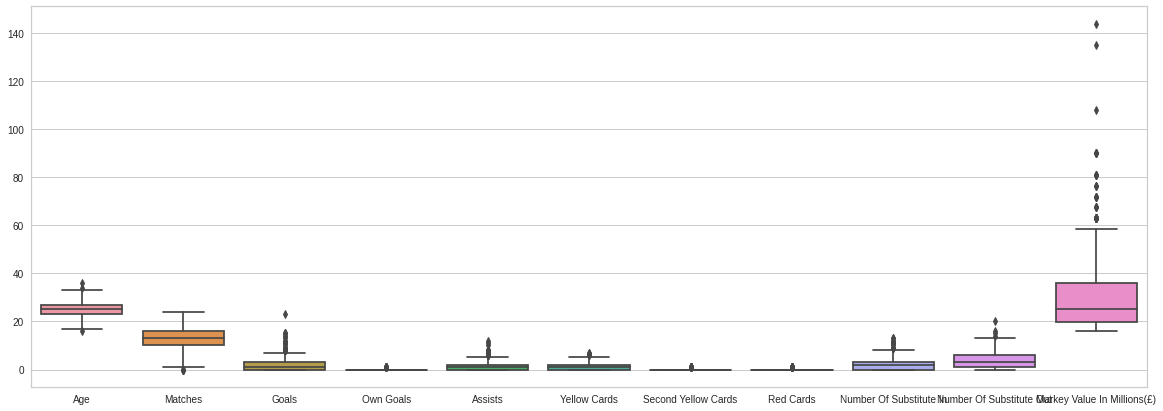

In [426]:
plt.figure(figsize=(20,7))
sns.boxplot(data=numeric_df)

**Scaling**

In [427]:

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

names = numeric_df.columns
d = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Age,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out,Markey Value In Millions(£)
0,0.30,0.666667,0.304348,0.0,0.916667,0.428571,0.0,0.0,0.000000,0.40,1.000000
1,0.25,0.416667,0.565217,0.0,0.333333,0.142857,0.0,0.0,0.000000,0.05,0.929577
2,0.60,0.666667,0.304348,0.0,0.166667,0.285714,0.0,0.0,0.153846,0.10,0.718310
3,0.50,0.625000,0.086957,0.0,0.250000,0.142857,0.0,0.0,0.153846,0.40,0.577465
4,0.65,0.625000,0.652174,0.0,0.500000,0.142857,0.0,0.0,0.000000,0.15,0.577465


<AxesSubplot:>

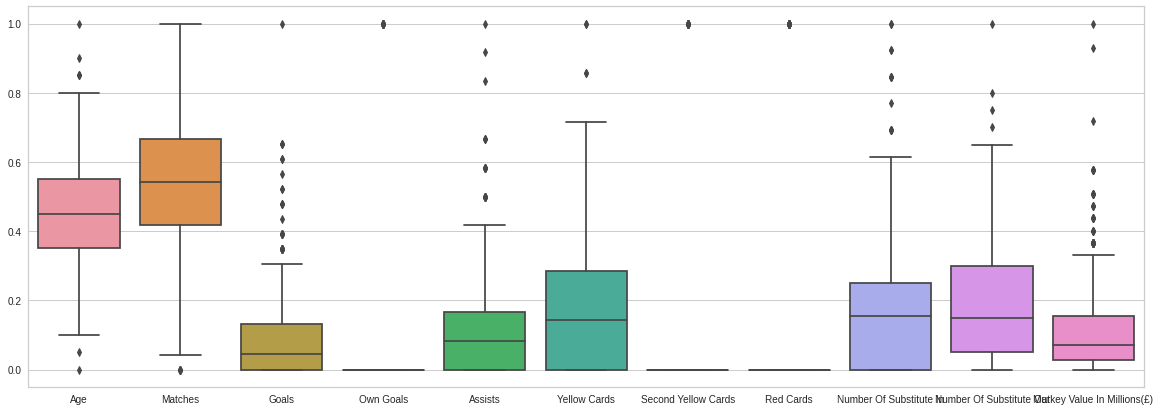

In [428]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=scaled_df)

In [429]:
df_multiclass=df[['Position','Country','Club']]

In [430]:
df = pd.concat([scaled_df, df_multiclass], axis=1, join='inner')

In [431]:
df.head()

,Age,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out,Markey Value In Millions(£),Position,Country,Club
0,0.30,0.666667,0.304348,0.0,0.916667,0.428571,0.0,0.0,0.000000,0.40,1.000000,3,17,50
1,0.25,0.416667,0.565217,0.0,0.333333,0.142857,0.0,0.0,0.000000,0.05,0.929577,3,36,14
2,0.60,0.666667,0.304348,0.0,0.166667,0.285714,0.0,0.0,0.153846,0.10,0.718310,3,16,69
3,0.50,0.625000,0.086957,0.0,0.250000,0.142857,0.0,0.0,0.153846,0.40,0.577465,7,16,42
4,0.65,0.625000,0.652174,0.0,0.500000,0.142857,0.0,0.0,0.000000,0.15,0.577465,10,15,41


In [432]:
corr=df.corr()


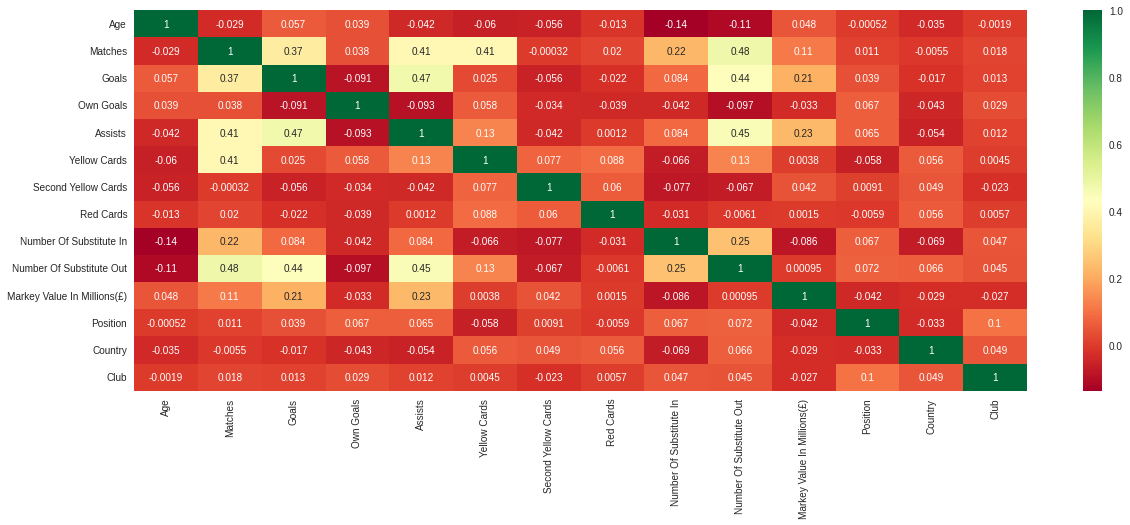

In [433]:
plt.figure(figsize=(20,7))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

In [434]:
from sklearn.model_selection import train_test_split

df, df_unseen = train_test_split(df, test_size=0.1, random_state=25)

print(df.shape)
print(df_unseen.shape)

(450, 14)
(50, 14)


**Linear Regression**

In [435]:
from pycaret.regression import *


In [436]:
reg = setup(df, target = 'Markey Value In Millions(£)',
            numeric_features=['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards','Red Cards', 'Number Of Substitute In','Number Of Substitute Out'], 
            categorical_features=['Position','Country','Club'],remove_multicollinearity = True, multicollinearity_threshold = 0.8)

,Description,Value
0,session_id,1079
1,Target,Markey Value In Millions(£)
2,Original Data,"(450, 14)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(314, 112)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Position',
                                                            'Country', 'Club'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['Age', 'Matches',
                                                          'Goals', 'Own Goals',
                                                          'Assists',
                                                          'Yellow Cards',
                                                          'Second Yellow Cards',
                                                          'Red Cards',
                                                          'Number Of '
        

In [437]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0896,1.640000e-02,0.1230,6.910000e-02,0.1001,1.605600e+00,0.178
br,Bayesian Ridge,0.0908,1.570000e-02,0.1220,5.570000e-02,0.1000,1.733000e+00,0.041
rf,Random Forest Regressor,0.0910,1.670000e-02,0.1241,5.430000e-02,0.1013,1.600800e+00,0.879
ridge,Ridge Regression,0.0907,1.540000e-02,0.1214,4.050000e-02,0.0987,1.666900e+00,0.027
xgboost,Extreme Gradient Boosting,0.0929,1.770000e-02,0.1277,-1.340000e-02,0.1046,1.602900e+00,0.385
omp,Orthogonal Matching Pursuit,0.0954,1.820000e-02,0.1298,-4.880000e-02,0.1056,1.652100e+00,0.032
llar,Lasso Least Angle Regression,0.1035,1.930000e-02,0.1341,-1.121000e-01,0.1101,2.085300e+00,0.021
dummy,Dummy Regressor,0.1035,1.930000e-02,0.1341,-1.121000e-01,0.1101,2.085300e+00,0.012
en,Elastic Net,0.1035,1.930000e-02,0.1341,-1.121000e-01,0.1101,2.085300e+00,0.027
lasso,Lasso Regression,0.1035,1.930000e-02,0.1341,-1.121000e-01,0.1101,2.085300e+00,0.027


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1079, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1079, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [438]:
lr=create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2863.1941,9.801244e+07,9900.1230,-1.132158e+10,3.1172,13329.3447
1,0.0767,9.300000e-03,0.0965,2.262000e-01,0.0789,0.7278
2,1055.9678,3.567541e+07,5972.8896,-1.861745e+09,1.7917,3076.7502
3,2046.5765,4.595506e+07,6779.0156,-3.404605e+09,3.0159,19507.2246
4,110.5491,3.780169e+05,614.8307,-1.043706e+07,1.4668,2.3741
5,521.8190,8.438128e+06,2904.8457,-7.647191e+08,1.7268,5861.2827
6,251.1736,1.954320e+06,1397.9698,-8.098290e+07,1.5428,551.7592
7,0.0756,8.900000e-03,0.0942,-3.103000e-01,0.0815,1.8187
8,0.1214,3.710000e-02,0.1927,-3.000000e-04,0.1371,1.6949


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 3
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................


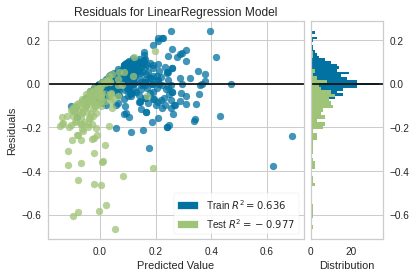

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [439]:
plot_model(lr, plot='residuals')

In [440]:
tuned_lr=tune_model(lr,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,278.6318,1.241323e+06,1114.1469,-1.433873e+08,2.0863,1057.6473
1,0.0768,9.300000e-03,0.0966,2.245000e-01,0.0789,0.7271
2,0.1079,1.970000e-02,0.1402,-2.580000e-02,0.1158,1.2484
3,601.6964,5.419978e+06,2328.0847,-4.015420e+08,2.5960,7572.8687
4,71.6972,1.588124e+05,398.5128,-4.384816e+06,1.3892,2.3787
5,351.7595,3.833746e+06,1957.9952,-3.474394e+08,1.6561,3951.5894
6,92.5106,2.647802e+05,514.5679,-1.097193e+07,1.3638,204.3062
7,0.0796,9.300000e-03,0.0965,-3.758000e-01,0.0847,2.0027
8,0.1208,3.690000e-02,0.1922,5.200000e-03,0.1367,1.6616


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 4
INFO:logs:LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)
INFO:logs:tune_model() succesfully completed......................................


**Top Features **

In [441]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [442]:
predictions = predict_model(tuned_lr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1429,0.0389,0.1973,-0.9767,0.1272,1.9824


In [443]:
final_lr = finalize_model(tuned_lr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Decla

In [444]:
predict_model(final_lr);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0969,0.0176,0.1327,0.1048,0.1079,2.0762


In [445]:
br=create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0847,0.0109,0.1043,-0.2574,0.0919,2.5623
1,0.0745,0.0093,0.0966,0.2243,0.0832,0.7526
2,0.1008,0.0148,0.1218,0.2259,0.1015,1.3879
3,0.0909,0.0163,0.1278,-0.2092,0.1064,0.6508
4,0.1060,0.0308,0.1755,0.1495,0.1295,1.6009
5,0.0834,0.0104,0.1020,0.0569,0.0900,2.2519
6,0.1158,0.0226,0.1505,0.0618,0.1211,1.8022
7,0.0685,0.0072,0.0846,-0.0566,0.0754,1.8587
8,0.1015,0.0256,0.1601,0.3096,0.1150,1.5316


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 7
INFO:logs:BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:create_model() succesfully completed......................................


In [446]:
print(br)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


In [447]:
tuned_br=tune_model(br,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0847,0.0110,0.1048,-0.2679,0.0921,2.5533
1,0.0747,0.0093,0.0965,0.2258,0.0831,0.7547
2,0.1009,0.0148,0.1215,0.2300,0.1014,1.3692
3,0.0916,0.0165,0.1283,-0.2198,0.1067,0.6511
4,0.1058,0.0304,0.1744,0.1607,0.1286,1.5869
5,0.0832,0.0104,0.1022,0.0535,0.0902,2.2506
6,0.1141,0.0222,0.1490,0.0804,0.1199,1.7659
7,0.0681,0.0072,0.0846,-0.0557,0.0754,1.8406
8,0.1007,0.0249,0.1578,0.3295,0.1132,1.5014


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 8
INFO:logs:BayesianRidge(alpha_1=0.15, alpha_2=1e-07, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.0001, lambda_2=0.005,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)
INFO:logs:tune_model() succesfully completed......................................


In [448]:
evaluate_model(tuned_br)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=BayesianRidge(alpha_1=0.15, alpha_2=1e-07, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.0001, lambda_2=0.005,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [449]:
predictions = predict_model(tuned_br)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=BayesianRidge(alpha_1=0.15, alpha_2=1e-07, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.0001, lambda_2=0.005,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.0949,0.0205,0.1432,-0.0417,0.1161,1.6367


In [450]:
final_br = finalize_model(tuned_br)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=BayesianRidge(alpha_1=0.15, alpha_2=1e-07, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.0001, lambda_2=0.005,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing BayesianRidge(alpha_1=0.15, alpha_2=1e-07, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.0001, lambda_2=0.005,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=BayesianRidge(alpha_1=0.15, alpha_2=1e-07, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.0001, lambda_2=0.005,
              lambda_init=None, n_

In [451]:
print(final_br)

BayesianRidge(alpha_1=0.15, alpha_2=1e-07, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.0001, lambda_2=0.005,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)


In [452]:
predict_model(final_br);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=BayesianRidge(alpha_1=0.15, alpha_2=1e-07, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.0001, lambda_2=0.005,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.0971,0.018,0.1343,0.0832,0.1089,2.1165


In [453]:
rig=create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0865,0.0122,0.1105,-0.4107,0.0895,2.5241
1,0.0780,0.0094,0.0970,0.2183,0.0837,0.7748
2,0.1024,0.0150,0.1226,0.2152,0.1027,1.2428
3,0.0986,0.0180,0.1343,-0.3357,0.1105,0.7171
4,0.1057,0.0279,0.1670,0.2299,0.1216,1.5450
5,0.0830,0.0112,0.1056,-0.0107,0.0935,2.2701
6,0.1058,0.0195,0.1397,0.1918,0.1125,1.7356
7,0.0674,0.0073,0.0857,-0.0845,0.0761,1.7112
8,0.0984,0.0239,0.1548,0.3549,0.1114,1.3496


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 11
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1079, solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................


In [454]:
tuned_rig = tune_model(rig)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0844,0.0107,0.1032,-0.2310,0.0909,2.5913
1,0.0744,0.0093,0.0967,0.2232,0.0832,0.7514
2,0.1008,0.0149,0.1221,0.2214,0.1017,1.4038
3,0.0870,0.0156,0.1248,-0.1546,0.1043,0.6468
4,0.1059,0.0307,0.1751,0.1537,0.1291,1.5959
5,0.0836,0.0104,0.1018,0.0610,0.0898,2.2550
6,0.1148,0.0224,0.1496,0.0729,0.1204,1.7809
7,0.0689,0.0072,0.0846,-0.0576,0.0755,1.8741
8,0.1013,0.0254,0.1594,0.3155,0.1145,1.5233


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 12
INFO:logs:Ridge(alpha=3.51, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1079, solver='auto', tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


In [455]:
predict_model(tuned_rig);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Ridge(alpha=3.51, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1079, solver='auto', tol=0.001), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.0953,0.0203,0.1423,-0.0294,0.1153,1.7198


In [456]:
lasso=create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0898,0.0105,0.1024,-0.2109,0.0911,3.0889
1,0.0865,0.0120,0.1097,-0.0006,0.0932,0.8533
2,0.1133,0.0196,0.1401,-0.0246,0.1154,1.7977
3,0.0913,0.0143,0.1197,-0.0616,0.1001,0.7584
4,0.1245,0.0366,0.1913,-0.0108,0.1440,2.3445
5,0.0940,0.0123,0.1109,-0.1152,0.0968,2.4091
6,0.1360,0.0294,0.1713,-0.2162,0.1387,1.9776
7,0.0819,0.0083,0.0910,-0.2236,0.0821,2.4299
8,0.1231,0.0378,0.1944,-0.0180,0.1425,1.9656


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 14
INFO:logs:Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1079,
      selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [457]:
tuned_lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0898,0.0105,0.1024,-0.2109,0.0911,3.0889
1,0.0865,0.0120,0.1097,-0.0006,0.0932,0.8533
2,0.1133,0.0196,0.1401,-0.0246,0.1154,1.7977
3,0.0913,0.0143,0.1197,-0.0616,0.1001,0.7584
4,0.1245,0.0366,0.1913,-0.0108,0.1440,2.3445
5,0.0940,0.0123,0.1109,-0.1152,0.0968,2.4091
6,0.1360,0.0294,0.1713,-0.2162,0.1387,1.9776
7,0.0819,0.0083,0.0910,-0.2236,0.0821,2.4299
8,0.1231,0.0378,0.1944,-0.0180,0.1425,1.9656


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 15
INFO:logs:Lasso(alpha=4.649999999999999, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1079,
      selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [458]:
predict_model(tuned_lasso);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Lasso(alpha=4.649999999999999, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1079,
      selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.1027,0.0199,0.141,-0.0102,0.1146,2.4027


**Linear Regression**

Mean Absolute error : 0.09

Mean Squared error : 0.0134

Root Mean Squared error : 0.1159

R-Sqare value : 0.128

**Bayesian Ridge**

Mean Absolute error : 0.1012

Mean Squared error : 0.0205

Root Mean Squared error : 0.1431

R-Sqare value : 0.1661

**Ridge Regression(L2)**

Mean Absolute error : 0.1002

Mean Squared error : 0.0249

Root Mean Squared error : 0.1578

R-Sqare value : -0.0137

**Lasso Regression(L2)**

Mean Absolute error : 0.1104

Mean Squared error : 0.0246

Root Mean Squared error : 0.157

R-Sqare value : -0.0034

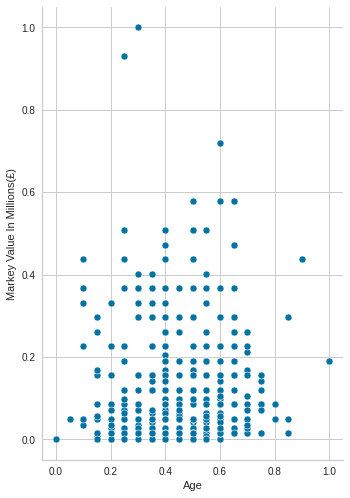

In [459]:
p = sns.pairplot(df, x_vars=['Age'], y_vars='Markey Value In Millions(£)', size=7, aspect=0.7)

In [460]:
ols_df = df.rename(columns={'Markey Value In Millions(£)': 'market_value'})
ols_df


,Age,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out,market_value,Position,Country,Club
493,0.50,0.208333,0.000000,0.0,0.000000,0.285714,0.0,0.0,0.000000,0.05,0.000000,2,16,6
469,0.20,0.833333,0.000000,0.0,0.000000,0.428571,0.0,0.0,0.000000,0.05,0.000000,2,17,48
290,0.30,0.708333,0.217391,0.0,0.250000,0.285714,0.0,0.0,0.230769,0.45,0.049296,7,39,0
423,0.55,0.250000,0.000000,0.0,0.000000,0.142857,0.0,0.0,0.076923,0.00,0.014085,2,9,29
449,0.70,0.708333,0.173913,0.0,0.083333,0.000000,0.0,0.0,0.461538,0.35,0.014085,7,47,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.50,0.750000,0.391304,0.0,0.333333,0.142857,0.0,1.0,0.384615,0.20,0.049296,3,24,80
143,0.65,0.666667,0.043478,0.0,0.166667,0.428571,0.0,0.0,0.000000,0.30,0.154930,4,11,35
474,0.25,0.125000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.15,0.000000,6,16,69
318,0.65,0.500000,0.043478,0.0,0.000000,0.714286,0.0,0.0,0.000000,0.00,0.049296,2,16,18


 **TOP FEATURES**

**LINEARITY**

In [461]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

X = ols_df[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards','Red Cards', 'Number Of Substitute In','Number Of Substitute Out','Position','Country','Club']]

y = ols_df['market_value']
#fit multiple linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     4.184
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.41e-06
Time:                        03:42:38   Log-Likelihood:                 277.08
No. Observations:                 450   AIC:                            -526.2
Df Residuals:                     436   BIC:                            -468.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

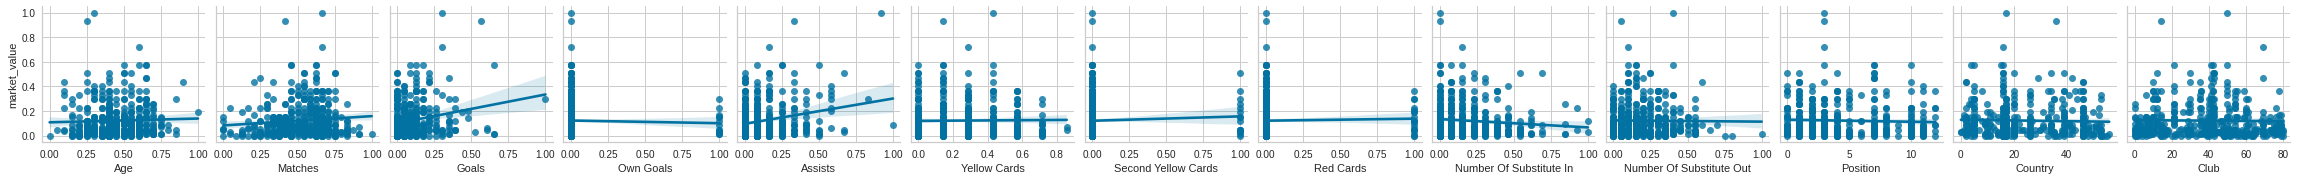

In [462]:
sns.pairplot(ols_df, y_vars=['market_value'], x_vars=['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards','Red Cards', 'Number Of Substitute In','Number Of Substitute Out','Position','Country','Club'], kind='reg')


Independence

In [463]:
from statsmodels.stats.stattools import durbin_watson
dw_test = durbin_watson(model.resid)
dw_test

2.073515291443027

homoscedasticity

<AxesSubplot:>

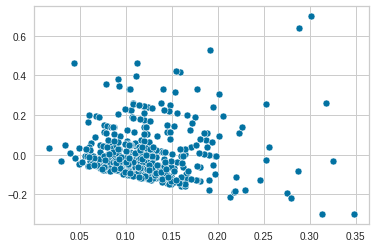

In [464]:
# Check for homoscedasticity using a plot of residuals vs fitted values
X = ols_df[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards', 'Red Cards', 'Number Of Substitute In', 'Number Of Substitute Out', 'Position', 'Country', 'Club']]
y = ols_df['market_value']
model = sm.OLS(y, sm.add_constant(X)).fit()

# plot residuals vs fitted values
sns.scatterplot(x=model.fittedvalues, y=model.resid)

Normality

Text(0.5, 1.0, 'Model Residuals Q-Q Plot')

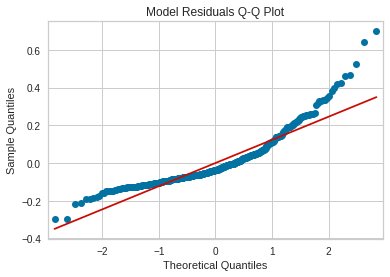

In [465]:
# Check for normality using a Q-Q plot of residuals
sm.qqplot(model.resid, line='r')
plt.title("Model Residuals Q-Q Plot")

**Multiclass Classification**

In [466]:
!pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.56.4-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Using cached llvmlite-0.39.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.4 which is incompatible.


In [467]:
from pycaret.classification import *

In [468]:
model_description = setup(data = df, target = 'Position',
                          numeric_features=['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards','Red Cards', 'Number Of Substitute In','Number Of Substitute Out','Markey Value In Millions(£)'], 
            categorical_features=['Country','Club'],feature_selection = True,feature_selection_threshold=0.50, remove_outliers=True,remove_multicollinearity = True, multicollinearity_threshold = 0.8)

,Description,Value
0,session_id,4058
1,Target,Position
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(450, 14)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Country', 'Club'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Age', 'Matches',
                                                          'Goals', 'Own Goals',
                                                          'Assists',
                                                          'Yellow Cards',
                                                          'Second Yellow Cards',
                                                          'Red Cards',
                                                          'Number Of '
                                      

In [469]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2915,0.0747,0.2480,0.2552,0.2591,0.1962,0.1998,0.304
rf,Random Forest Classifier,0.2886,0.0762,0.2119,0.1866,0.2214,0.1768,0.1844,0.521
et,Extra Trees Classifier,0.2416,0.0754,0.1680,0.1767,0.1938,0.1284,0.1324,0.240
xgboost,Extreme Gradient Boosting,0.2415,0.0000,0.2064,0.2231,0.2189,0.1565,0.1594,2.323
dt,Decision Tree Classifier,0.2352,0.0649,0.2083,0.2475,0.2231,0.1398,0.1423,0.045
ada,Ada Boost Classifier,0.2349,0.0608,0.1417,0.0896,0.1242,0.0986,0.1309,0.184
gbc,Gradient Boosting Classifier,0.2241,0.0799,0.1628,0.2215,0.2037,0.1231,0.1261,3.793
lr,Logistic Regression,0.2010,0.0673,0.1226,0.1318,0.1520,0.0714,0.0749,0.107
ridge,Ridge Classifier,0.1879,0.0000,0.1162,0.1333,0.1515,0.0679,0.0697,0.039
svm,SVM - Linear Kernel,0.1811,0.0000,0.1492,0.1516,0.1556,0.0742,0.0760,0.091


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4058, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4058, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [470]:
rf= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1667,0.0000,0.1500,0.1389,0.1503,0.0494,0.0501
1,0.3000,0.0000,0.1742,0.1981,0.2316,0.1743,0.1855
2,0.4000,0.7619,0.2292,0.2305,0.2897,0.2932,0.3087
3,0.3000,0.0000,0.1667,0.2028,0.2406,0.1913,0.1974
4,0.3000,0.0000,0.2424,0.1867,0.2259,0.1743,0.1837
5,0.3000,0.0000,0.2167,0.2022,0.2378,0.1964,0.2018
6,0.2000,0.0000,0.1909,0.0971,0.1277,0.0805,0.0858
7,0.3333,0.0000,0.3045,0.2444,0.2756,0.2386,0.2440
8,0.3103,0.0000,0.2576,0.1868,0.2256,0.2033,0.2139


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4058, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [471]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4058, verbose=0,
                       warm_start=False)


In [472]:
tuned_rf=tune_model(rf,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2667,0.0000,0.1591,0.1393,0.1810,0.1361,0.1462
1,0.2333,0.0000,0.1212,0.1108,0.1500,0.0861,0.0941
2,0.3667,0.7666,0.1875,0.1700,0.2317,0.2460,0.2703
3,0.3000,0.0000,0.1742,0.1424,0.1923,0.1689,0.1855
4,0.2333,0.0000,0.1288,0.1058,0.1453,0.0824,0.0918
5,0.2667,0.0000,0.1591,0.1058,0.1514,0.1429,0.1578
6,0.2667,0.0000,0.1591,0.1132,0.1549,0.1361,0.1575
7,0.3000,0.0000,0.1909,0.1363,0.1852,0.1829,0.2057
8,0.3793,0.0000,0.2273,0.1675,0.2298,0.2669,0.3001


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4058, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [473]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4058, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [474]:
predict_model(tuned_rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4058, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.3382,0.7226,0.2376,0.3167,0.2838,0.2377,0.2464


,Number Of Substitute In,Country_11.0,Country_33.0,Country_26.0,Club_22.0,Country_5.0,Country_47.0,Country_52.0,Country_22.0,Club_67.0,...,Club_45.0,Country_4.0,Club_80.0,Club_50.0,Club_29.0,Country_28.0,Club_49.0,Position,Label,Score
0,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.19
1,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,3,0.36
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0.51
3,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,3,0.32
4,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,1,0.39
132,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0.41
133,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.44
134,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,0.27


In [475]:
final_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4058, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_im

In [476]:
unseen_predictions = predict_model(final_rf, data=df_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4058, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.32,0,0.1929,0.2611,0.2831,0.2071,0.2093


,Age,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out,Markey Value In Millions(£),Position,Country,Club,Label,Score
411,0.45,0.250000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.076923,0.00,0.014085,2,16,29,2,0.33
380,0.70,0.458333,0.000000,0.0,0.083333,0.142857,0.0,0.0,0.000000,0.10,0.028169,1,5,29,1,0.19
38,0.50,0.750000,0.347826,0.0,0.333333,0.000000,0.0,0.0,0.461538,0.50,0.366197,10,20,12,3,0.42
254,0.60,0.583333,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.153846,0.20,0.070423,11,39,79,1,0.20
234,0.55,0.500000,0.086957,0.0,0.250000,0.285714,0.0,0.0,0.153846,0.45,0.084507,1,50,35,0,0.24


**MULTICOLLINEARITY**

In [477]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# prepare the data
X = ols_df[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards','Red Cards', 'Number Of Substitute In','Number Of Substitute Out','Position','Country','Club']]

y = ols_df['market_value']

# calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print the results
print(vif)

                    Features        VIF
0                        Age   5.955055
1                    Matches  12.828126
2                      Goals   2.283443
3                  Own Goals   1.085762
4                    Assists   2.525964
5               Yellow Cards   2.919178
6        Second Yellow Cards   1.060136
7                  Red Cards   1.068978
8    Number Of Substitute In   2.156679
9   Number Of Substitute Out   3.772413
10                  Position   2.536926
11                   Country   3.210190
12                      Club   3.400936


Questions:

* Is the relationship significant?

Linear Regression: Markey Value In Millions(£) is target variable and most of features contribute to target variable except for yellow cards, second yellow cards, red cards, own goals being close to zero and not contributing.

MultiClass Classification: Position is target variable and most of features contribute to target variable except for country, club, second yellow cards, red cards, own goals being close to zero and not contributing.

* Are any model assumptions violated?

Linear Regression

Linearity: The relationship between the independent variables and the dependent variable are not linear and this is violated.

Independence: The errors are independent of each other.

Homoscedasticity: The variance of the errors is constant across all levels of the independent variables. Scatterplot shows a random scatter of points around the horizontal line (y=0) with no obvious patterns or trends, it suggests that the assumption of homoscedasticity is met.

Normality: The errors are normally distributed. If the residuals follow the red line fairly closely, it suggests that the assumption of normality is met.

MultiClass Classification

However, for tree-based models such as Random Forest, some of these assumptions are not as relevant. For example, linearity is not a concern since the model is not based on a linear relationship between the predictor variables and the response variable.

Homoscedasticity and normality are also not as critical since the model makes no assumptions about the distribution of the errors.

Independence is still important, but it is automatically satisfied by the tree-based model.

Therefore, in the case of Random Forest, we can focus more on evaluating model performance metrics such as accuracy, precision, recall, and F1 score, rather than checking assumptions.


* Is there any multicollinearity in the model?

As collinearity remain common for the whole data set irrespective of the type of classification.we also observe high collinearity between features Markey Value In Millions(£) and Matches


* In the multivariate models are predictor variables independent of all the other predictor variables?

we  observe high collinearity between features Markey Value In Millions(£) and Matches




* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Linear Regression:

Country

Club

Number of Substitute Out

Goals

Number of Substitute In

Age

Assists

Multiclass Classification:

Number of Substitute Out

Goals

Markey Value In Millions(£)

Matches

Age

Number of Substitute In

Assists

Yellow Cards



* Does the model make sense?

Yes. For target Position classification there are 13 classes and Random Forest supports Multiclass classification. We used randomm forest which is a classification algorithm consisting of many decisions trees. For regression we are using Linear regression helps in predicting numeric target variable Markey Value In Millions(£) using other predictors.


* Does regularization help?

Ridge and Lasso Regression seem to have a worse performance than both Linear Regression and Bayesian Ridge, as their R-Square values are negative. This suggests that regularization might not help in this case.

* Which independent variables are significant?


Linear Regression:

Country

Club

Number of Substitute Out

Goals

Number of Substitute In

Age

Assists

Multiclass Classification:

Number of Substitute Out

Goals

Markey Value In Millions(£)

Matches

Age

Number of Substitute In

Assists

Yellow Cards




* Which hyperparameters are important?


Three hyperpameter were passed to all models wherein these Parameters are set to true

these parameter are set to True

1) remove_multicollinearity = True

2) feature_selection= True

3) remove_outliers= True

With their respective threshold

1)feature_selection_threshold=0.50,

2)multicollinearity_threshold = 0.8



**LICENSE**

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**References**

PyCaret Documentation: https://pycaret.org/feature-selection/


Tutorial on Feature Selection in PyCaret: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


StatsModels Documentation on VIF: https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
 

AutoML_MultiClass_BinaryClassification_regression: https://www.kaggle.com/code/saibabaprakash1/automl-multiclass-binaryclassification-regression/notebook#Linear-regression


StatsModels Documentation on OLS: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html



Blog post on Understanding Regression Analysis: https://towardsdatascience.com/understanding-regression-analysis-5b5c5ff5a35d